# Standard Bayesian Best-Worst Method Solver (1–9 Scale) for Clustering Decision-makers

This Jupyter Notebook provides a solver for the Best-Worst Method (BWM) using standard inputs, where all pairwise comparisons are given on a 1–9 scale (or any similar ones), and supports **clustering of decision makers**. The notebook demonstrates how to group decision makers into homogeneous clusters using a Bayesian model based on their preference patterns. This allows for the identification of subgroups with similar preferences, and the analysis of weights within and across clusters.  Individual weights for each decision maker are also provided.


**Instructions for Use:**

- Each code cell can be executed independently.
- To run a cell, select it and press `Shift+Enter`. This will execute the cell and display the output below it.
- Follow the workflow from top to bottom, ensuring that variables and modules are defined before they are used in subsequent cells.

Use this notebook to analyze your multi-criteria decision-making problems with the BWM approach, leveraging the provided visualizations and analysis tools, and to explore the clustering of decision makers based on their preferences.

In [1]:
import sys
import os
sys.path.append(os.path.abspath("../../src"))

from BayesMCDM import BWM
from BayesMCDM.Visualizer import CredalRanking, ClusterVisualizer

# Bayesian Best-Worst Method

The Best-Worst Method (BWM) is a popular Multi-Criteria Decision-Making (MCDM) technique used to determine the relative importance (weights) of a set of criteria. In BWM, the decision-maker first identifies the most important (Best) and least important (Worst) criteria. Then, two sets of pairwise comparisons are provided:

- **Best-to-Others (B/O):** The decision-maker rates how much more important the Best criterion is compared to each of the other criteria.
- **Others-to-Worst (O/W):** The decision-maker rates how much more important each criterion is compared to the Worst criterion.

For group decision-making, the responses from all participants are aggregated. Specifically, all Best-to-Others vectors are combined into a matrix (denoted as `a_b`), and all Others-to-Worst vectors are combined into another matrix (denoted as `a_w`). **Each row of `a_b` and `a_w` corresponds to the responses from a single decision maker.** These matrices serve as the input for the Bayesian BWM, which then computes the optimal weight distributions for each criterion, reflecting the collective preferences of the group.

There is also a variable named `criteria_names`, which contains the names of the criteria in the same order as in the matrices. This variable will be used later for visualization, ensuring that plots and charts are clearly labeled with the appropriate criterion names. Additionally, there is a variable named `cluster_no`, which specifies the number of clusters to be used in certain visualizations or analyses. Clustering helps group similar criteria based on their weights or other attributes, providing additional insights into the decision-making process.

**If you want to solve your own problem**, you only need to change the values of `a_b` and `a_w` to reflect your own pairwise comparisons, and then execute the rest of the cells in this notebook.

In [2]:
a_b =  [
    [ 3, 4, 6, 1, 5, 2, 9, 7],
    [ 1, 2, 8, 4, 5, 3, 9, 6],
    [ 2, 2, 3, 1, 5, 5, 9, 8],
    [ 2, 1, 8, 2, 9, 3, 8, 8],
    [ 2, 4, 9, 1, 4, 3, 5, 5],
    [ 9, 8, 1, 9, 7, 5, 5, 6],
    [ 8, 7, 3, 8, 6, 7, 1, 4],
    [ 9, 7, 2, 7, 5, 6, 1, 3],
    [ 8, 8, 2, 8, 6, 6, 1, 5],
    [ 9, 7, 3, 9, 5, 7, 1, 4],
]

a_w =  [
    [ 7, 6, 4, 9, 5, 8, 1, 3],
    [ 9, 8, 2, 5, 4, 5, 1, 3],
    [ 8, 8, 5, 9, 5, 5, 1, 2],
    [ 8, 9, 2, 8, 1, 8, 2, 2],
    [ 8, 6, 1, 9, 6, 7, 4, 4],
    [ 1, 2, 9, 1, 3, 5, 5, 4],
    [ 3, 3, 7, 2, 6, 2, 8, 7],
    [ 2, 3, 8, 3, 6, 4, 7, 6],
    [ 1, 2, 7, 2, 5, 4, 8, 5],
    [ 2, 3, 8, 1, 4, 3, 9, 7],
]

criteria_names = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8']
cluster_no = 2  # Set the number of clusters for decision makers

## Solving the Bayesian BWM Clustering

In this section, we solve the Bayesian Best-Worst Method (BWM) using the standard 1–9 scale for pairwise comparisons. The matrices `a_b` (Best-to-Others) and `a_w` (Others-to-Worst) are provided as inputs, representing the aggregated judgments from all decision makers.

The Bayesian BWM algorithm is extended here to support **clustering of decision makers**. By modeling the responses of each decision maker, the algorithm groups them into homogeneous clusters based on their preference patterns. This approach allows us to identify subgroups of decision makers with similar decision-making behavior and to analyze the weights both within and across these clusters. The probabilistic framework captures the uncertainty and variability in preferences, providing a richer understanding of the group structure compared to traditional deterministic methods.

The parameter `dm_cluster_number` specifies the number of clusters for decision makers. Adjust this parameter to control how many subgroups the algorithm will identify within your set of decision makers.


In [3]:
bwm = BWM.StandardBWM(AB=a_b, AW=a_w, dm_cluster_number=cluster_no, num_samples=100)
bwm.sampling()

Building...
Sampling started...
Sampling finished.


## Sumamry Statistics
In the `bwm` object, several statistics are available from the posterior distribution computed by the Bayesian BWM algorithm:

- **`bwm.dm_cluster_centers`**: The mean of the posterior weight distributions for each criterion within each cluster, representing the consensus weights for each identified subgroup of decision makers.
- **`bwm.dm_cluster_center_samples`**: The full set of posterior samples for the weights of each criterion within each cluster, capturing the uncertainty and variability in preferences for each subgroup.
- **`bwm.dm_weight`**: The mean posterior weights for each criterion, calculated separately for each decision maker (DM).
- **`bwm.dm_weight_samples`**: The full set of posterior samples for the weights of each criterion, provided separately for each DM.

The first two attributes summarize the aggregated results for each subgroups, while the last two provide detailed statistics for each individual decision maker.

In [4]:
print("Mean weights of the identified clusters (groups):")
header = f"{'Cluster':<16}" + "".join(f"{name:<10}" for name in criteria_names)
print(header)
print("-" * len(header))

# Print each cluster's weights with row header as Cluster i
for i, row in enumerate(bwm.dm_cluster_centers):
    row_str = "".join(f"{w:<10.4f}" for w in row)
    print(f"Cluster{i+1:<8}{row_str}")

Mean weights of the identified clusters (groups):
Cluster         C1        C2        C3        C4        C5        C6        C7        C8        
------------------------------------------------------------------------------------------------
Cluster1       0.1656    0.1521    0.0909    0.1768    0.1048    0.1388    0.0797    0.0914    
Cluster2       0.0852    0.0978    0.1829    0.0892    0.1109    0.1062    0.2026    0.1252    


# Visualization of Bayesian BWM Clustering Results

- **Credal Ranking:**  
    The credal ranking visualizes the probability that one criterion is more important than another, based on the posterior distributions of their weights. This approach quantifies the strength of preference between criteria, providing a probabilistic ranking rather than a single deterministic order.  
    You can plot the credal ranking separately for each cluster of decision makers identified by the method. This allows you to compare the ranking of criteria within different subgroups.

- **Clustering Visualization:**  
    The clustering plots illustrate how the method groups decision makers into homogeneous clusters based on their preference patterns. These visualizations help you understand the structure of the group, reveal subgroups with similar decision-making behavior, and explore the separation between clusters. Several types of clustering plots are available, such as PCA projections, parallel coordinates, violin plots, and heatmaps, each providing a different perspective on the identified clusters.

For credal ranking visualization, it is necessary to provide the samples from the posterior distribution of the criteria weights, along with the `criteria_names` for labeling. In this example, we use the aggregated posterior weight samples (`bwm.dm_cluster_center_samples`) of the first group and the corresponding `criteria_names` to plot the credal ranking, which reflects the extent to which one criterion is more important than another for the group of the decision making.

To visualize a different cluster, simply modify the `cluster` variable to the desired cluster index (it must be less than `cluster_no`).

The `CredalRanking` object contains a variable `probs`, which is a matrix of computed probabilities. Each entry `probs[i, j]` represents the probability that criterion *i* is more important than criterion *j* according to the posterior samples.

In [5]:
cluster = 0 # the cluster index you want to visualize, it should be less than cluster_no
credal_ranking = CredalRanking(bwm.dm_cluster_center_samples[cluster].T, criteria_names=criteria_names) 

# Print the credal ranking probability matrix as a DataFrame for better readability
print(credal_ranking.credal_probs())

      C1    C2    C3    C4    C5    C6    C7    C8
C1  0.00  0.58  0.83  0.40  0.82  0.74  0.83  0.82
C2  0.42  0.00  0.83  0.32  0.80  0.64  0.82  0.81
C3  0.17  0.17  0.00  0.18  0.34  0.19  0.63  0.55
C4  0.60  0.68  0.82  0.00  0.82  0.76  0.81  0.83
C5  0.18  0.20  0.66  0.18  0.00  0.22  0.76  0.68
C6  0.26  0.36  0.81  0.24  0.78  0.00  0.85  0.81
C7  0.17  0.18  0.37  0.19  0.24  0.15  0.00  0.39
C8  0.18  0.19  0.45  0.17  0.32  0.19  0.61  0.00


### Default Plot 
By calling the `plot` function from the `credal_ranking` object, we generate a weighted directed graph that visually represents the probabilistic ranking of the criteria. In this graph, each node corresponds to a criterion, and a directed edge from node A to node B (A → B) indicates that criterion A is more likely to be more important than criterion B based on the posterior distributions.

There are two ways to display the probabilities on the graph:

- **If `show_probs` is `False`**: The probabilities are encoded by the line style of the edges, as indicated in the legend. Different line styles represent different probability ranges.
- **If `show_probs` is `True`**: The actual probability values are displayed as weights on the edges, providing a quantitative measure of confidence for each pairwise comparison.

This visualization helps to intuitively understand both the ranking and the strength of preference among the criteria.

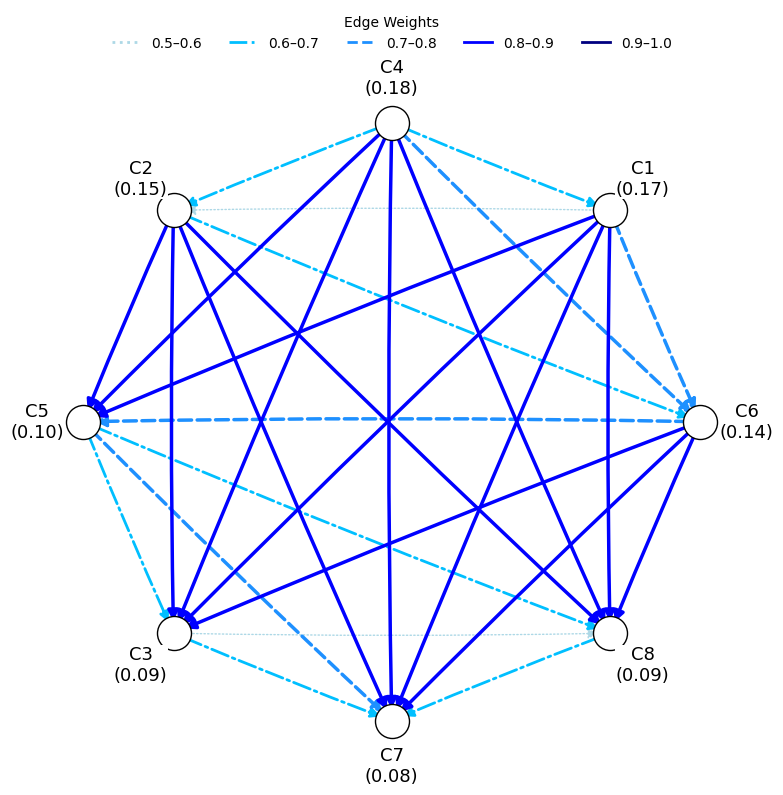

In [6]:
credal_ranking.plot(show_probs=False)

# Clustering Visualization

In [7]:
cluster_visualizer = ClusterVisualizer(model=bwm.samples, criteria_names=criteria_names)

AssertionError: Weights must be provided for this model.

## Cluster Projection Plot

The `plot_projection` method of the `ClusterVisualizer` object provides a low-dimensional visualization of the clustering results. By projecting the high-dimensional weight vectors of decision makers into a 2D or 3D space (using techniques such as PCA), this plot allows you to visually inspect how decision makers are grouped into clusters.

**How to interpret:**
- Each point represents a decision maker, positioned according to their preference profile.
- Colors indicate cluster membership, making it easy to see the separation and cohesion of clusters.
- Well-separated clusters suggest distinct groups of decision makers with similar preferences, while overlapping clusters indicate more similarity between groups.

**Customization options:**
- `d_plot`: Set to 2 for a 2D plot or 3 for a 3D plot (default: 2).
- Additional keyword arguments can be used to adjust plot appearance (see documentation for details).

This visualization helps to intuitively understand the structure and quality of the clustering in the context of the decision makers' preferences.
```

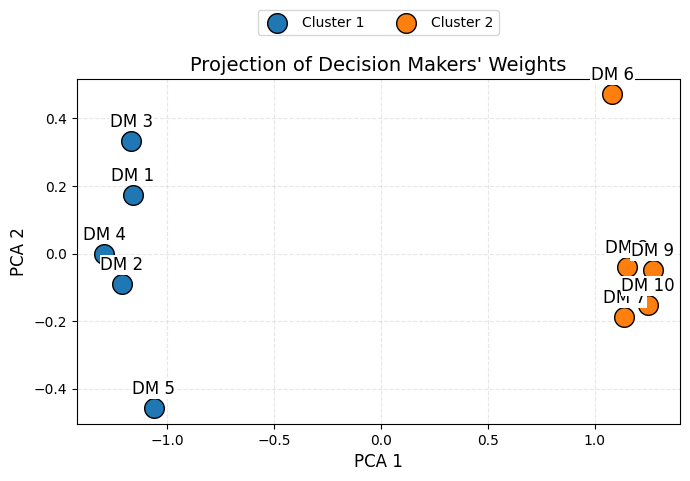

In [ ]:
cluster_visualizer.plot_projection(d_plot=2)

## Parallel Coordinates Plot of Cluster Mean Weights

The parallel coordinates plot visualizes the mean weights assigned to each criterion by different clusters of decision makers. Each vertical axis represents a criterion, and each line corresponds to a cluster, connecting its mean weights across all criteria.

**How to interpret:**
- Each colored line shows the preference profile of a cluster, with the position on each axis indicating the mean weight for that criterion.
- Lines that are close together across axes indicate clusters with similar preferences, while lines that diverge highlight differences between clusters.
- This plot makes it easy to compare the relative importance of criteria within and between clusters, and to identify patterns or outliers in group preferences.

**Customization options:**
- `fontsize`: Adjusts the font size for axis labels and tick marks (default: 12).
- `title_fontsize`: Sets the font size for the plot title (default: 16).
- `bold`: If set to `True`, displays the title in bold font (default: `False`).

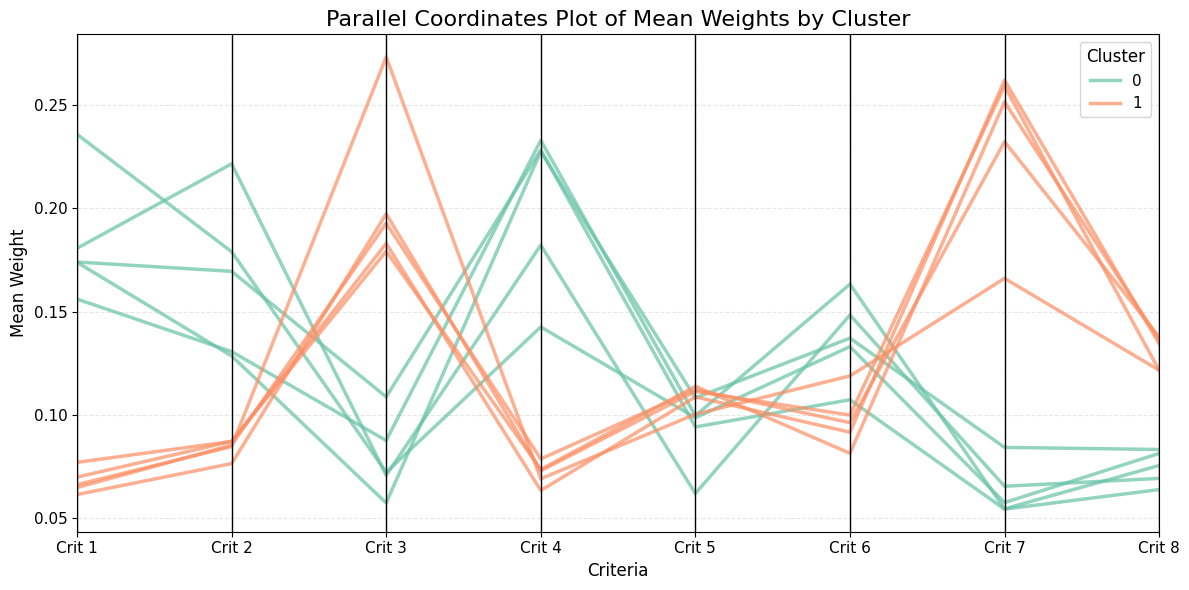

In [ ]:
cluster_visualizer.plot_parallel_coordinates()

## Radar Chart of Cluster Mean Weights

The radar chart provides a visual comparison of the mean weights assigned to each criterion by different clusters of decision makers. Each axis of the radar chart represents a criterion, and each cluster is shown as a separate polygon connecting its mean weights across all criteria.

**How to interpret:**
- The shape and area of each cluster's polygon reflect its preference profile across the criteria.
- Overlapping areas indicate similar preferences between clusters, while distinct shapes highlight differences.
- This visualization makes it easy to compare the relative importance of criteria within and between clusters.

**Customization options:**
- `font_size`: Adjusts the font size for axis labels and tick marks (default: 12).
- `title_fontsize`: Sets the font size for the chart title (default: 15).
- `bold`: If set to `True`, displays the title in bold font (default: `False`).
```

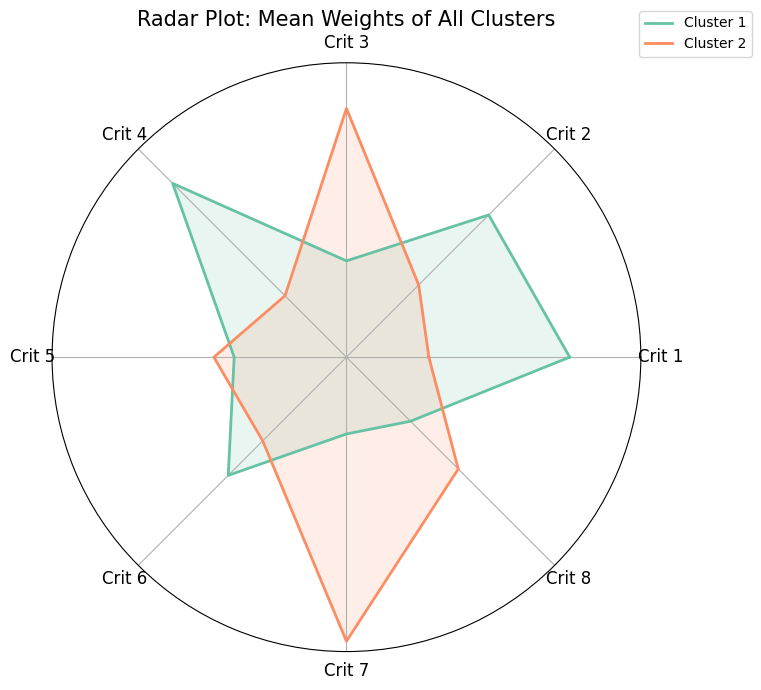

In [ ]:
cluster_visualizer.plot_radar()

## Violin Plot of Clustered Weights

The violin plot displays the distribution of mean weights for each criterion, grouped by cluster. Each "violin" represents the spread and density of the posterior mean weights assigned to a criterion within a cluster, providing insight into both the central tendency and variability of preferences among decision makers in each group.

**How to interpret:**  
- The width of each violin at a given value indicates the density of decision makers assigning that weight to the criterion.
- The plot allows for easy comparison of weight distributions across clusters and criteria, highlighting similarities and differences in group preferences.

**Customization options:**  
- `font_size`: Set the font size for axis labels and ticks (default: 12).
- `title_fontsize`: Set the font size for the plot title (default: 15).
- `bold`: Display the title in bold font if set to `True` (default: `False`).

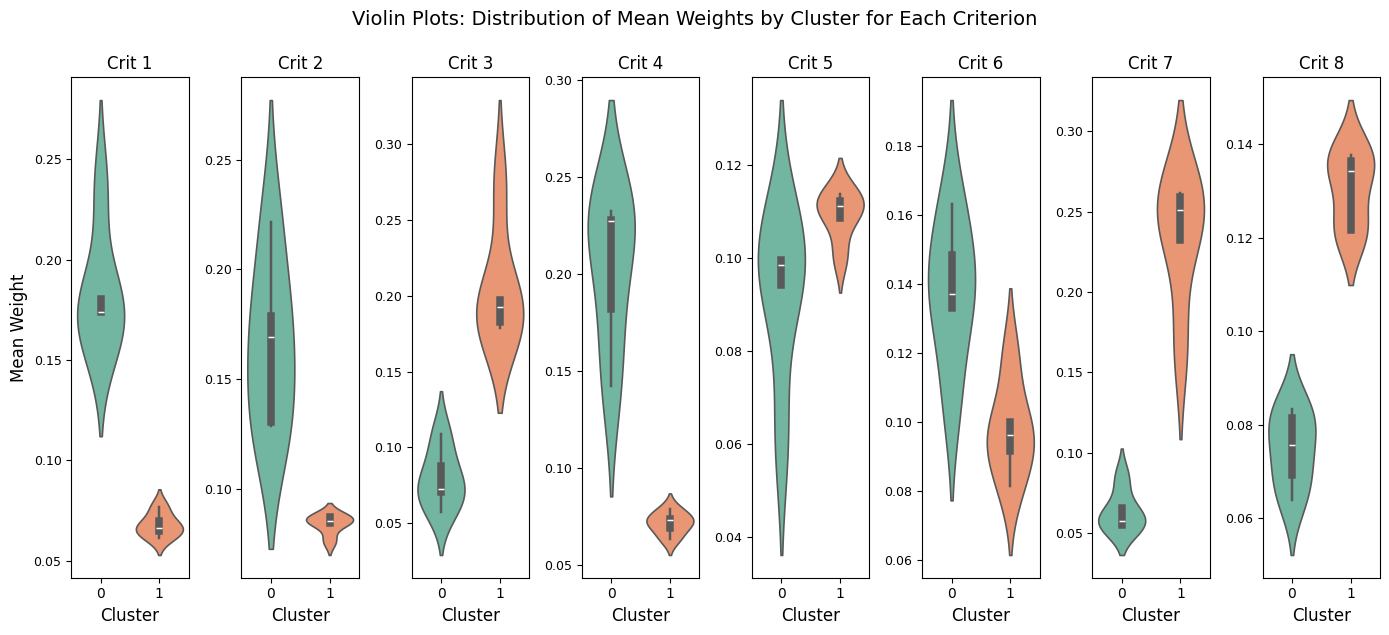

In [ ]:
cluster_visualizer.plot_violin(font_size=12, title_fontsize=14, bold=True)

## Cluster Heatmap

The cluster heatmap provides a visual summary of how decision makers are grouped into clusters based on their preference patterns. In this plot, each row  represents a decision maker, and each column corresponds to a criterion. The color intensity in each cell reflects the weight assigned to a criterion by a decision maker or the cluster center, making it easy to compare patterns across individuals and clusters.


This visualization is especially useful for interpreting the structure of the clusters and understanding the diversity of opinions within the group.

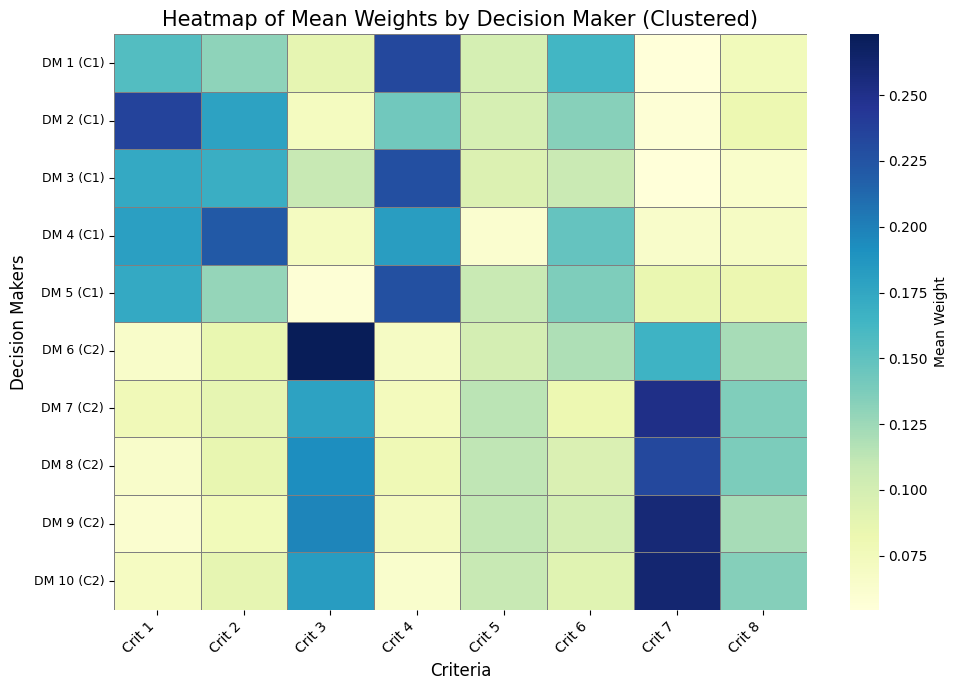

In [ ]:
cluster_visualizer.plot_cluster_heatmap()